In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("fake_news.csv")

In [9]:
print("First look of dataframe\n\n",df.head())
print("\n-------------------------------------------------------------------------")
print("\n\nSize of dataframe",df.shape)
print("\n-------------------------------------------------------------------------")
print("\n\nData types of column",df.dtypes)

First look of dataframe

    label                                          full_text  digit
0  False  abortion says the annies list political group ...      0
1   True  energy history job accomplishments when did th...      1
2   True  foreign policy hillary clinton agrees with joh...      1
3   True  education the chicago bears have had more star...      1
4   True  ethics i m the only person on this stage who h...      1

-------------------------------------------------------------------------


Size of dataframe (54037, 3)

-------------------------------------------------------------------------


Data types of column label          bool
full_text    object
digit         int64
dtype: object


In [4]:
df.isnull().sum()

label        0
full_text    1
digit        0
dtype: int64

## Checking the balance of data

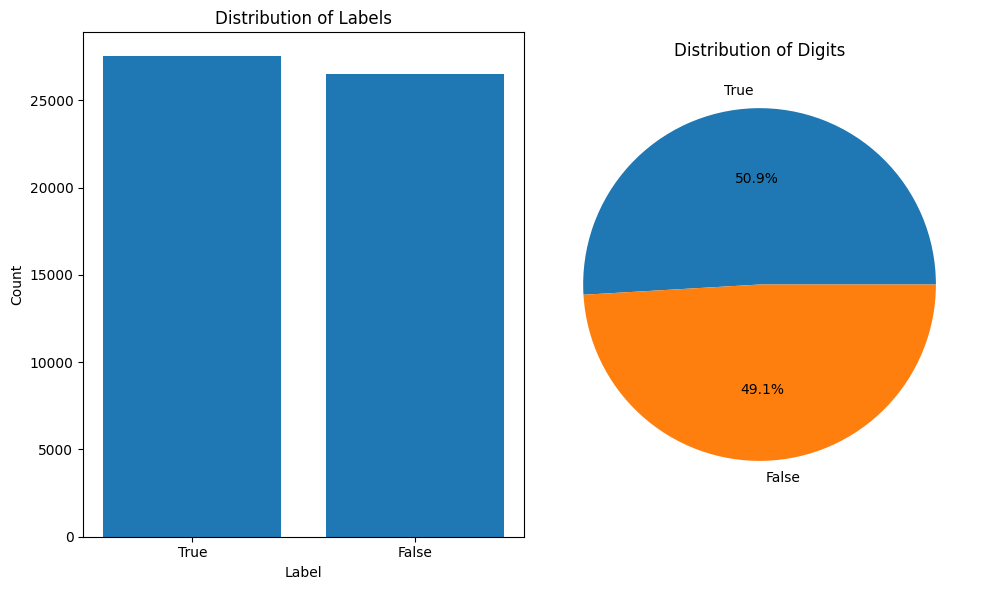

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label in the 'label' column
label_counts = df['label'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

axes[0].bar(label_counts.index.astype(str), label_counts.values)
axes[0].set_title('Distribution of Labels')
axes[0].set_xlabel('Label')
axes[0].set_ylabel('Count')

axes[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
axes[1].set_title('Distribution of Digits')

plt.tight_layout()
plt.show()

### Checking values, which have only space and not considered under null values

In [5]:
import re

In [6]:
# converting the values with only single spaces, into null values by removing the space in rows
df['full_text'].replace(r'^\s+$', np.nan, regex=True, inplace=True)
df.isnull().sum()


label          0
full_text    631
digit          0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

label        0
full_text    0
digit        0
dtype: int64

In [8]:
print("Size of Dataframe after removal of null values: \n\n", df.shape)

df.head()

Size of Dataframe after removal of null values: 

 (54037, 3)


,label,full_text,digit
0,False,abortion says the annies list political group ...,0
1,True,energy history job accomplishments when did th...,1
2,True,foreign policy hillary clinton agrees with joh...,1
3,True,education the chicago bears have had more star...,1
4,True,ethics i m the only person on this stage who h...,1


### Converting all text to lower case

In [16]:
# df['label'] = df['label'].str.lower()
df['full_text'] = df['full_text'].str.lower()

df.head()

,label,full_text,digit
0,False,abortion says the annies list political group ...,0
1,True,energy history job accomplishments when did th...,1
2,True,foreign policy hillary clinton agrees with joh...,1
3,True,education the chicago bears have had more star...,1
4,True,ethics i m the only person on this stage who h...,1


### Validating the encoding values

In [41]:
true_values = all(df.loc[df['label'] == True, 'digit'] == 1)

# Check if all 'False' values have 0 in 'digit' column
false_values = all(df.loc[df['label'] == False, 'digit'] == 0)

# Print the validation result
print("All rows with 'True' have 1 in 'digit' column:", true_values)
print("All rows with 'False' have 0 in 'digit' column:", false_values)

All rows with 'True' have 1 in 'digit' column: True
All rows with 'False' have 0 in 'digit' column: True


In [43]:
df.tail()

,label,full_text,digit
54663,True,brussels (reuters) - nato allies on tuesday we...,1
54664,True,"london (reuters) - lexisnexis, a provider of l...",1
54665,True,minsk (reuters) - in the shadow of disused sov...,1
54666,True,moscow (reuters) - vatican secretary of state ...,1
54667,True,jakarta (reuters) - indonesia will buy 11 sukh...,1


### Removing punctuation from the text

In [45]:
import string

# Function to remove punctuation from a string
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the remove_punctuation function to the 'full_text' column
df['full_text'] = df['full_text'].apply(remove_punctuation)

# Display the DataFrame after removing punctuation
df.head()


,label,full_text,digit
0,False,abortion says the annies list political group ...,0
1,True,energy history job accomplishments when did th...,1
2,True,foreign policy hillary clinton agrees with joh...,1
3,True,education the chicago bears have had more star...,1
4,True,ethics i m the only person on this stage who h...,1


### Removing stopwords

In [48]:
with open('stopwords.txt') as stopwords_file:
    stopwords = set(stopwords_file.read().splitlines())

In [50]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [52]:
type(stopwords)

set

In [53]:
def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word.lower() not in stopwords])

In [54]:
df['full_text'] = df['full_text'].apply(remove_stopwords)

In [55]:
df.head()

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


### Removing URL or HyperLinks (Https)

In [56]:
! pip install urlextract



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
! python -m pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


In [61]:
from urlextract import URLExtract

In [64]:
def remove_urls(text):
    urls = extractor.find_urls(text)
    for url in urls:
        text = text.replace(url, '')
    return text

In [65]:
df['full_text'] = df['full_text'].apply(remove_urls)

In [66]:
df.head()

,label,full_text,digit
0,False,abortion says annies list political group supp...,0
1,True,energy history job accomplishments decline coa...,1
2,True,foreign policy hillary clinton agrees john mcc...,1
3,True,education chicago bears starting quarterbacks ...,1
4,True,ethics m person stage worked actively just las...,1


### Extracting the dataframe as csv file

In [70]:
df.to_csv(r"Dungent_Hunter_preprocessing.csv",index=False)